# Data Analysis  - Batter pada Permainan Baseball

Muhammad Hisyam -
A11.2018.11106

In [ ]:
## load packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as smf

In [ ]:
## load data

Batting = pd.read_csv('Batting.csv')
Batting.head()

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2004,1,SFN,NL,11,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
1,aardsda01,2006,1,CHN,NL,45,43,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0
2,aardsda01,2007,1,CHA,AL,25,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,aardsda01,2008,1,BOS,AL,47,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
4,aardsda01,2009,1,SEA,AL,73,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


## Langkah 1: Pertanyaan Riset / Pernyataan Masalah

1) Apa hubungan antara hit (H) dan run batted in (RBI) pada pemain baseball liga utama?

##### CATATAN:

- Hipotesis: Jumlah H yang lebih tinggi akan menghasilkan RBI yang lebih besar dalam satu musim
- Batasan potensial: Variabel lain dapat mempengaruhi hubungan antara H dan RBI, membutuhkan data tambahan untuk analisis di masa mendatang. Misalnya, di mana dalam urutan batting, batter memukul, jumlah peluang yang dimiliki batter dengan pelari dalam posisi mencetak gol, jenis lemparan yang dihadapi batter pada musim itu.

## Langkah 2: Strategi Pengumpulan / Pengukuran Data

1) Jenis data apa yang dibutuhkan

- Sumber data: Tabel Batting Database @maxtoki Github
- Masalah data: Data memukul disediakan dalam tabel dari tahun 1871 hingga 2011. Data musim yang lebih lama mungkin tidak ada.

2) Pengumpulan / Pengukuran

- Tidak ada data tambahan

3) Pembersihan Data

In [ ]:
df = Batting

In [ ]:
df.groupby(['yearID']).size()

yearID
1871     115
1872     156
1873     125
1874     123
1875     218
        ... 
2007    1385
2008    1385
2009    1249
2010    1245
2011    1240
Length: 141, dtype: int64

In [ ]:
df[['H', 'RBI']].isna().sum()

H      6284
RBI    6708
dtype: int64

> Sepertinya tidak ada kolom kosong, H tapi ada 6708 di kolom RBI.

In [ ]:
df = df.dropna(subset = ['H', 'RBI'])

df[['H', 'RBI']].isna().sum()

H      0
RBI    0
dtype: int64

In [ ]:
df.shape

(88487, 24)

> Sepertinya nilai yang hilang hanya ada di tahun 1882 dan 1884.

> Untuk keperluan analisis ini, saya mencoba menggunakan  tahun-tahun modern dan membatasi diri pada musim 2010 dan yang lebih besar.

In [ ]:
df = df[df['yearID'] > 2009]

In [ ]:
df.groupby(['yearID']).size()

yearID
2010    1245
2011    1240
dtype: int64

Ini hanya data dari 2010-2011.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


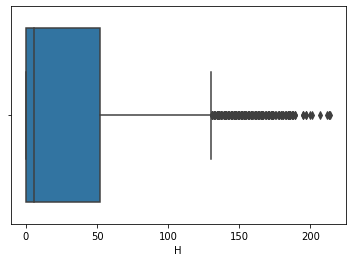

In [ ]:
sns.boxplot(df['H'])

In [ ]:
df['H'].quantile(q = (0, 0.25, 0.5, 0.75, 1))

0.00      0.0
0.25      0.0
0.50      6.0
0.75     52.0
1.00    214.0
Name: H, dtype: float64

> hasil: bahwa pemain dengan banyak AB(At Bat), Kemunculan di plate akan memiliki lebih banyak peluang untuk melakukan hit dan berpotensi lebih banyak peluang untuk menghasilkan run.

In [ ]:
df = df[df['H'] >= 50]

In [ ]:
df.shape

(640, 24)

## Langkah 3: Visualisasikan & Ringkas Data

- Visual H dan RBI

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Season H Totals for Players with >= 171 AB (Seasons 2010-2011)')

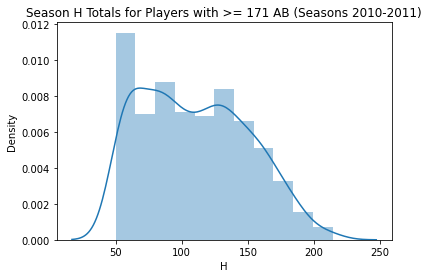

In [ ]:
## Hits = jumlah rata-rata hit dalam satu musim adalah sekitar 100

sns.distplot(df['H']).set_title('Season H Totals for Players with >= 171 AB (Seasons 2010-2011)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Season RBI Totals for Players with >= 171 AB (Seasons 2010-2011)')

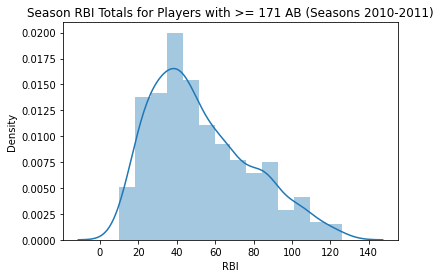

In [ ]:
## RBI = jumlah rata-rata RBI sekitar 40.

sns.distplot(df['RBI']).set_title('Season RBI Totals for Players with >= 171 AB (Seasons 2010-2011)')

- jumlah rata-rata hit dalam satu musim adalah sekitar 100 dan jumlah rata-rata RBI sekitar 40.

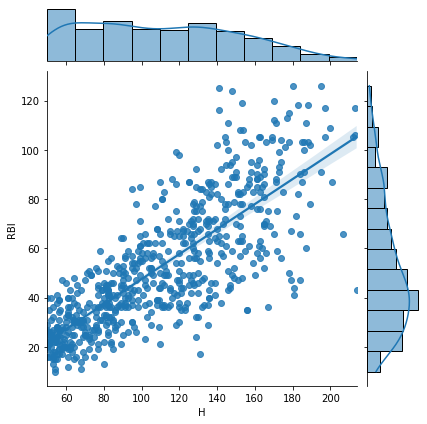

In [ ]:
sns.jointplot(x = 'H', y = 'RBI', data = df, kind = 'reg')

- Kita bisa melihat hubungan antara H dan RBI
- Menghasilkan beberapa statistik ringkasan

In [ ]:
df[['H', 'RBI']].mean()

H      109.948437
RBI     52.543750
dtype: float64

In [ ]:
df[['H', 'RBI']].std()

H      40.192715
RBI    25.823973
dtype: float64

##### Mean & SD

- H = 110 ± 40
- RBI = 52 ± 25

In [ ]:
df[['H', 'RBI']].corr()

,H,RBI
H,1.000000,0.789627
RBI,0.789627,1.000000


Korelasi antara H dan RBI adalah 0,78




## Langkah 4: Pengembangan Model / Interpretasi

- membuat model regresi sederhana

In [ ]:
y = df['RBI']
X = df['H']

X = smf.add_constant(X)

fit_lm = smf.OLS(y, X).fit()

In [ ]:
fit_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    RBI   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     1057.
Date:                Mon, 24 May 2021   Prob (F-statistic):          1.85e-137
Time:                        14:11:43   Log-Likelihood:                -2675.9
No. Observations:                 640   AIC:                             5356.
Df Residuals:                     638   BIC:                             5365.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2373      1.827     -1.772      0.077      -6.825       0.350
H              0.5073      0.016     32.505      0.000       0.477       0.538
==============================================================================
Omnibus:                       10.544   Durbin-Watson:                   1.405
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               17.587
Skew:                          -0.003   Prob(JB):                     0.000152
Kurtosis:                       3.812   Cond. No.                         341.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Langkah 5: Evaluasi Model

- Diagnostik model plot

In [ ]:
fitted_y = fit_lm.fittedvalues
residuals = fit_lm.resid

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Fitted')]

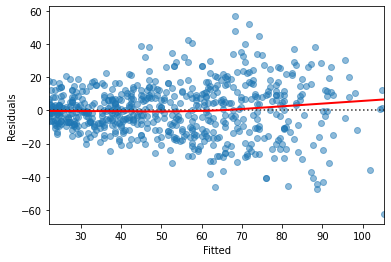

In [ ]:
model_plot = sns.residplot(x = fitted_y, y = residuals,
             lowess = True,
             scatter_kws = {'alpha': 0.5},
             line_kws = {'color': 'red', 'lw': 2})

model_plot.set(xlabel = "Fitted", ylabel = "Residuals")

(array([  1.,   8.,  19.,  75., 171., 200., 113.,  37.,  13.,   3.]),
 array([-62.33310782, -50.42953718, -38.52596654, -26.6223959 ,
        -14.71882525,  -2.81525461,   9.08831603,  20.99188667,
         32.89545731,  44.79902795,  56.7025986 ]),
 <a list of 10 Patch objects>)

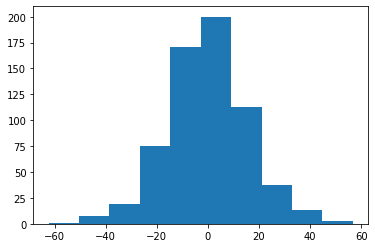

In [ ]:
plt.hist(x = residuals)

Text(0.5, 1.0, 'Observed ~ Predicted RBI colored by the number of H a player had')

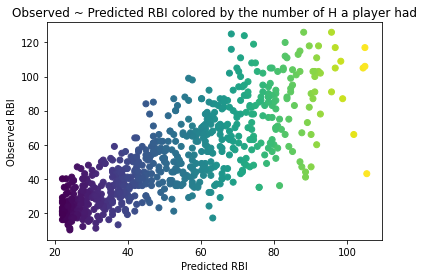

In [ ]:
plt.scatter(x = fitted_y, y = df['RBI'], c = df['H'])
plt.xlabel("diprediksi RBI")
plt.ylabel("yang diamati RBI")
plt.title("Observed ~ Predicted RBI colored by the number of H a player had")

In [ ]:
sq_residuals = residuals**2
mean_sq_resid = sq_residuals.mean()
rmse = np.sqrt(mean_sq_resid)
rmse

15.832870524255947

## Langkah 6: Komunikasi Hasil

1) Pertanyaan penelitian adalah untuk menguji hubungan antara H dan RBI pada pemain bisbol liga utama. Tampaknya ada hubungan antara kedua variabel dengan lebih banyak yang menghasilkan jumlah Proses yang lebih tinggi. Namun, dengan peningkatan jumlah, prediksi model menjadi lebih tidak terarah.

2) Prediksi yang lebih baik dapat dibuat dengan lebih banyak data yang dapat memberikan konteks seputar hit (situasi, pitching, urutan barisan, dll) dan harus dikumpulkan untuk analisis di masa mendatang.